# <font color='blue'>CSE483 Computer Vision: QR Code Reader</font>
    
</div>
<img src="https://bitly.com/blog/wp-content/uploads/2023/12/qr-code-generator-and-scanner-apps.png">



<div class="alert alert-block alert-info">   
<b>Steps:</b> 

1. Study ISO/IEC 18004 standard for QR codes
2. Research relevant classical computer vision algorithms.
3. Implement image preprocessing techniques.
4. Extract QR code frame (morphological operations and Hough transform).   
5. Apply geometric transformations to straighten the QR code frame.   
6. Implement manual QR decoding without machine learning or external libraries.
7. Test, debug, and ensure robustness.
8. Document implementation process, challenges, and solutions.


## <font color='Blue'>1. Defining the problem statement</font>  

<div class="alert alert-block alert-info">

The project focuses on developing an image processing pipeline using classical computer vision techniques to reliably decode QR codes. This involves preprocessing captured images to remove distortions, noise, and artifacts, extracting QR code frames accurately, applying geometric transformations for alignment, and implementing manual decoding algorithms based on ISO/IEC 18004 standard. 
    
</div>

[Test Cases](https://drive.google.com/drive/u/0/folders/1hK0BoIbEBC1YmcQrm1cHVAk7g_0jppP9)


# <font color='orange'>Import Libraries</font> 

In [1]:
!pip install opencv-python

Defaulting to user installation because normal site-packages is not writeable


In [24]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import dctn, idctn
from scipy.ndimage import median_filter


# <font color='orange'>Test Case 9: My phone fell while taking this one ... or did it </font> 

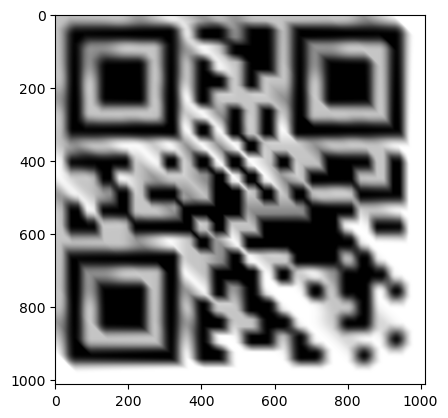

In [3]:
img9 = cv2.imread('Images/09-My-phone-fell-while-taking-this-one-...-or-did-it.png', cv2.COLOR_BGR2RGB)
plt.imshow(cv2.cvtColor(img9, cv2.COLOR_BGR2RGB))

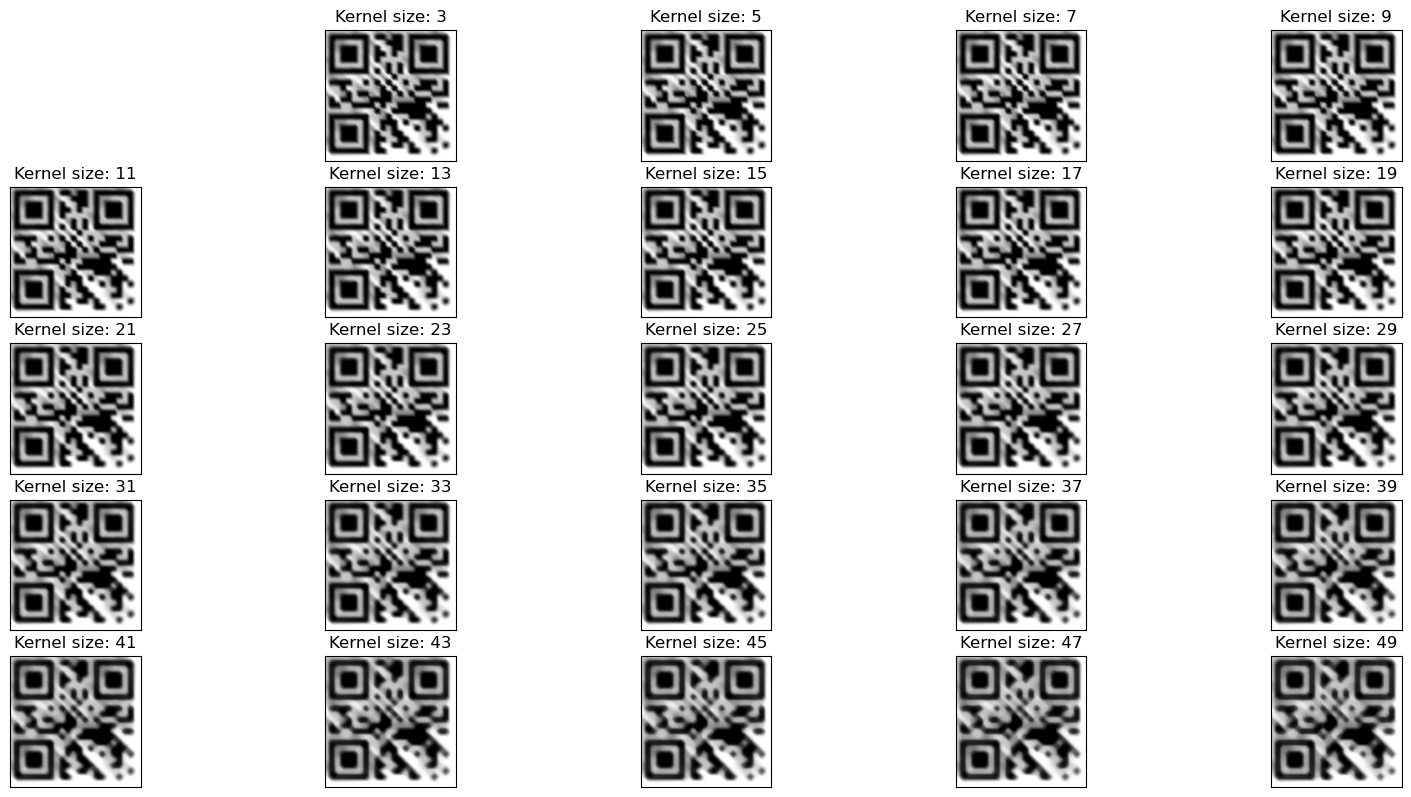

In [37]:
fig = plt.figure(figsize=(20, 20))
for i in range(3, 50, 1):
    if i % 2 == 0 or i == 1:
        continue

    blurred_image = cv2.medianBlur(img9, i)

    fig.add_subplot(10, 10, i)

    plt.title(f"Kernel size: {i}")

    # Remove ticks
    plt.xticks([])
    plt.yticks([])

    plt.imshow(blurred_image, cmap="gray")

plt.show()
     

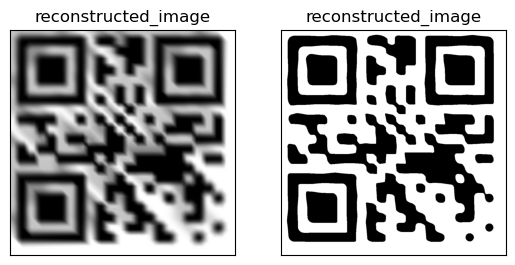

In [36]:


# Create a kernel for deconvolution (e.g., Gaussian kernel)
kernel_size = 7
kernel = cv2.getGaussianKernel(kernel_size, 0)
kernel = np.outer(kernel, kernel.transpose())

# Perform deconvolution
reconstructed_image = cv2.filter2D(img9, -9, kernel)
_, binary2_image = cv2.threshold(reconstructed_image, 95, 255, cv2.THRESH_BINARY)
flipped_image = cv2.flip(binary2_image, 1)
plt.subplot(121),plt.imshow(reconstructed_image, cmap = 'gray')
plt.title('reconstructed_image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(flipped_image[:,::-1], cmap = 'gray')
plt.title('reconstructed_image'), plt.xticks([]), plt.yticks([])
plt.show()



# <font color='orange'>Test Case 11: weewooweewooweewoo </font> 

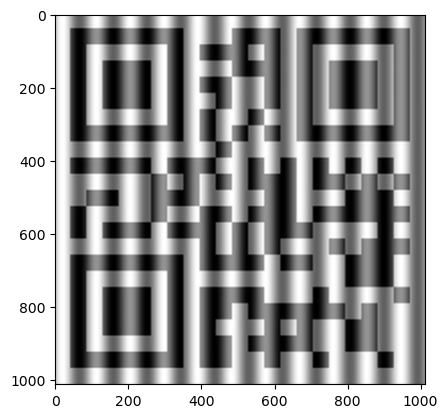

In [8]:
img11 = cv2.imread('Images/11-weewooweewooweewoo.png',  cv2.IMREAD_GRAYSCALE)
plt.imshow(img11, cmap="gray")

In [25]:
def adaptive_frequency_domain_filter(image, r, alpha):
    # Apply Discrete Cosine Transform (DCT)
    dct_image = dctn(image, norm='ortho')

    # Calculate the median of the DCT coefficients
    median_dct = median_filter(np.abs(dct_image), size=(9*r+1, 9*r+1), mode='reflect')

    # Create a mask to identify peaks in the DCT coefficients
    mask = np.abs(dct_image) > alpha * median_dct

    # Apply the median filter to the DCT coefficients based on the mask
    filtered_dct = (1 - mask) * dct_image + mask * median_filter(dct_image, size=(2*r+1, 2*r+1), mode='reflect')

    # Inverse DCT to get the filtered image
    filtered_image = idctn(filtered_dct, norm='ortho')

    # Normalize the filtered image
    filtered_image = cv2.normalize(filtered_image, None, 0, 255, cv2.NORM_MINMAX)

    return np.uint8(filtered_image)

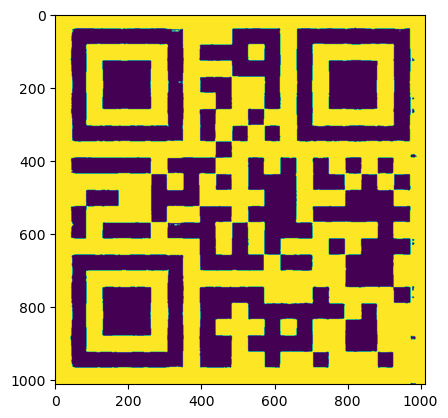

In [28]:

filtered_image = adaptive_frequency_domain_filter(img11, r=1, alpha=6.5)

# # Display and save the filtered image
# cv2.imshow('Filtered Image', filtered_image)
# cv2.waitKey(0)
# cv2.destroyAllWindows()
# cv2.imwrite('filtered_image.jpg', filtered_image)

_, binary3_image = cv2.threshold(filtered_image, 95, 255, cv2.THRESH_BINARY)
plt.imshow(binary3_image)

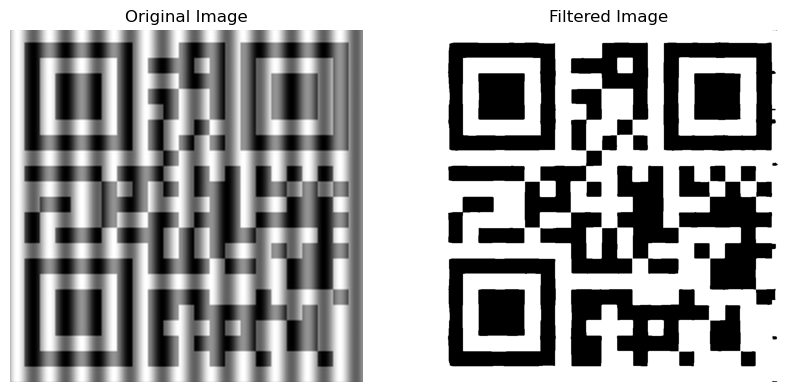

In [31]:
kernel = np.ones((21, 21), np.uint8)

# Apply opening to the binary image
opening_image = cv2.morphologyEx(binary3_image, cv2.MORPH_OPEN, kernel)


# Set up the figure and axes
fig, axs = plt.subplots(1, 2, figsize=(10, 5))  # Adjust the figsize as needed

# Display the original image
axs[0].imshow(img11, cmap='gray')  # Use cmap='gray' for grayscale images
axs[0].set_title('Original Image')
axs[0].axis('off')  # Hide the axes

# Display the filtered image
axs[1].imshow(opening_image, cmap='gray')  # Use cmap='gray' for grayscale images
axs[1].set_title('Filtered Image')
axs[1].axis('off')  # Hide the axes

# Show the plot
plt.show()

# <font color='orange'>Test Case 12: mal7-w-felfel</font> 


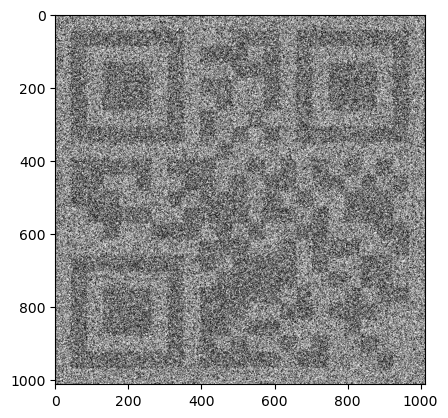

In [15]:
img12 = cv2.imread('Images/12-mal7-w-felfel.png', cv2.IMREAD_GRAYSCALE)
plt.imshow(cv2.cvtColor(img12, cv2.IMREAD_GRAYSCALE))

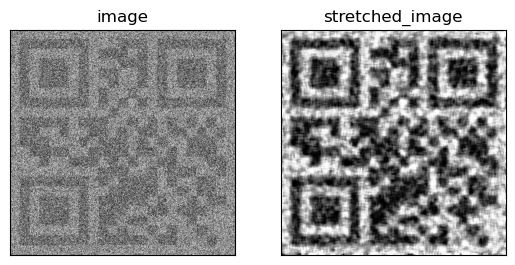

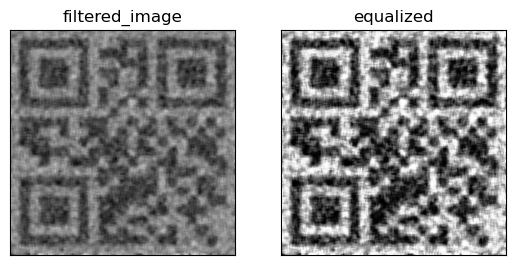

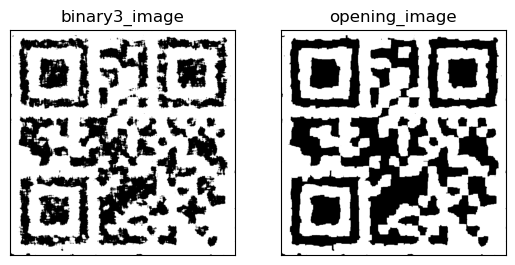

In [33]:
# Apply median filter
filtered_image = cv2.medianBlur(img12, 21)  # Adjust the kernel size as needed

# Apply histogram equalization to enhance the image
equalized = cv2.equalizeHist(filtered_image)

# Calculate the minimum and maximum pixel values in the image
min_val, max_val, _, _ = cv2.minMaxLoc(equalized)

# Perform contrast stretching
stretched_image = np.uint8((equalized - min_val) / (max_val - min_val) * 255)


_, binary3_image = cv2.threshold(equalized, 85, 255, cv2.THRESH_BINARY)

kernel = np.ones((21,21), np.uint8)

# Apply opening to the binary image
opening_image = cv2.morphologyEx(binary3_image, cv2.MORPH_OPEN, kernel)


plt.subplot(121),plt.imshow(img12, cmap = 'gray')
plt.title('image'), plt.xticks([]), plt.yticks([])

plt.subplot(122),plt.imshow(stretched_image, cmap = 'gray')
plt.title('stretched_image'), plt.xticks([]), plt.yticks([])
plt.show()

plt.subplot(121),plt.imshow(filtered_image, cmap = 'gray')
plt.title('filtered_image'), plt.xticks([]), plt.yticks([])

plt.subplot(122),plt.imshow(equalized, cmap = 'gray')
plt.title('equalized'), plt.xticks([]), plt.yticks([])
plt.show()

plt.subplot(121),plt.imshow(binary3_image, cmap = 'gray')
plt.title('binary3_image'), plt.xticks([]), plt.yticks([])

plt.subplot(122),plt.imshow(opening_image, cmap = 'gray')
plt.title('opening_image'), plt.xticks([]), plt.yticks([])

plt.show()

